In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_straw=pd.read_csv('MercerHall_WheatStraw.csv',sep=",",header=None)
df_grain=pd.read_csv('MercerHall_WheatGrain.csv',sep=",",header=None)

In [23]:
grain=np.array(df_grain).flatten()
straw=np.array(df_straw).flatten()

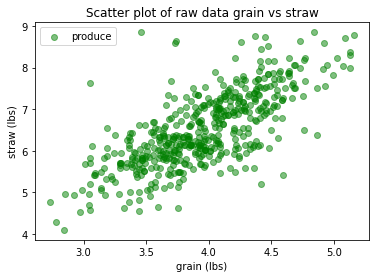

In [24]:
plt.scatter(grain, straw, color="green", alpha=0.5, label="produce")
plt.xlabel("grain (lbs)")
plt.ylabel("straw (lbs)")

plt.legend(loc='upper left')
plt.title("Scatter plot of raw data grain vs straw")
plt.show()

## Plot for the fig.6 mercer and hall

    


    

In [25]:
df_grain_flat=pd.DataFrame(pd.Series(grain))
df_straw_flat=pd.DataFrame(pd.Series(straw))
df_grain_flat = df_grain_flat.rename(columns={0: 'Grain'})
df_straw_flat = df_straw_flat.rename(columns={0: 'Straw'})
df_grain_stat=df_grain_flat.join(df_straw_flat, lsuffix='_g', rsuffix='_s')


In [26]:
df_grain_stat["group_g"]=(np.trunc(df_grain_stat["Grain"]*10))/10
dict_df=df_grain_stat.groupby(["group_g"]).mean().round(2).reset_index()
dict_gg=dict(zip(dict_df.group_g,dict_df.Grain))
df_grain_stat['Mean_g']=df_grain_stat['group_g'].map(dict_gg)
dict_sg=dict(zip(dict_df.group_g,dict_df.Straw))
df_grain_stat['Mean_s']=df_grain_stat['group_g'].map(dict_sg)

In [27]:
df_grain_stat=df_grain_stat.drop_duplicates(subset=["Mean_g"])
df_grain_stat=df_grain_stat.sort_values(by='Mean_g',ascending=True)

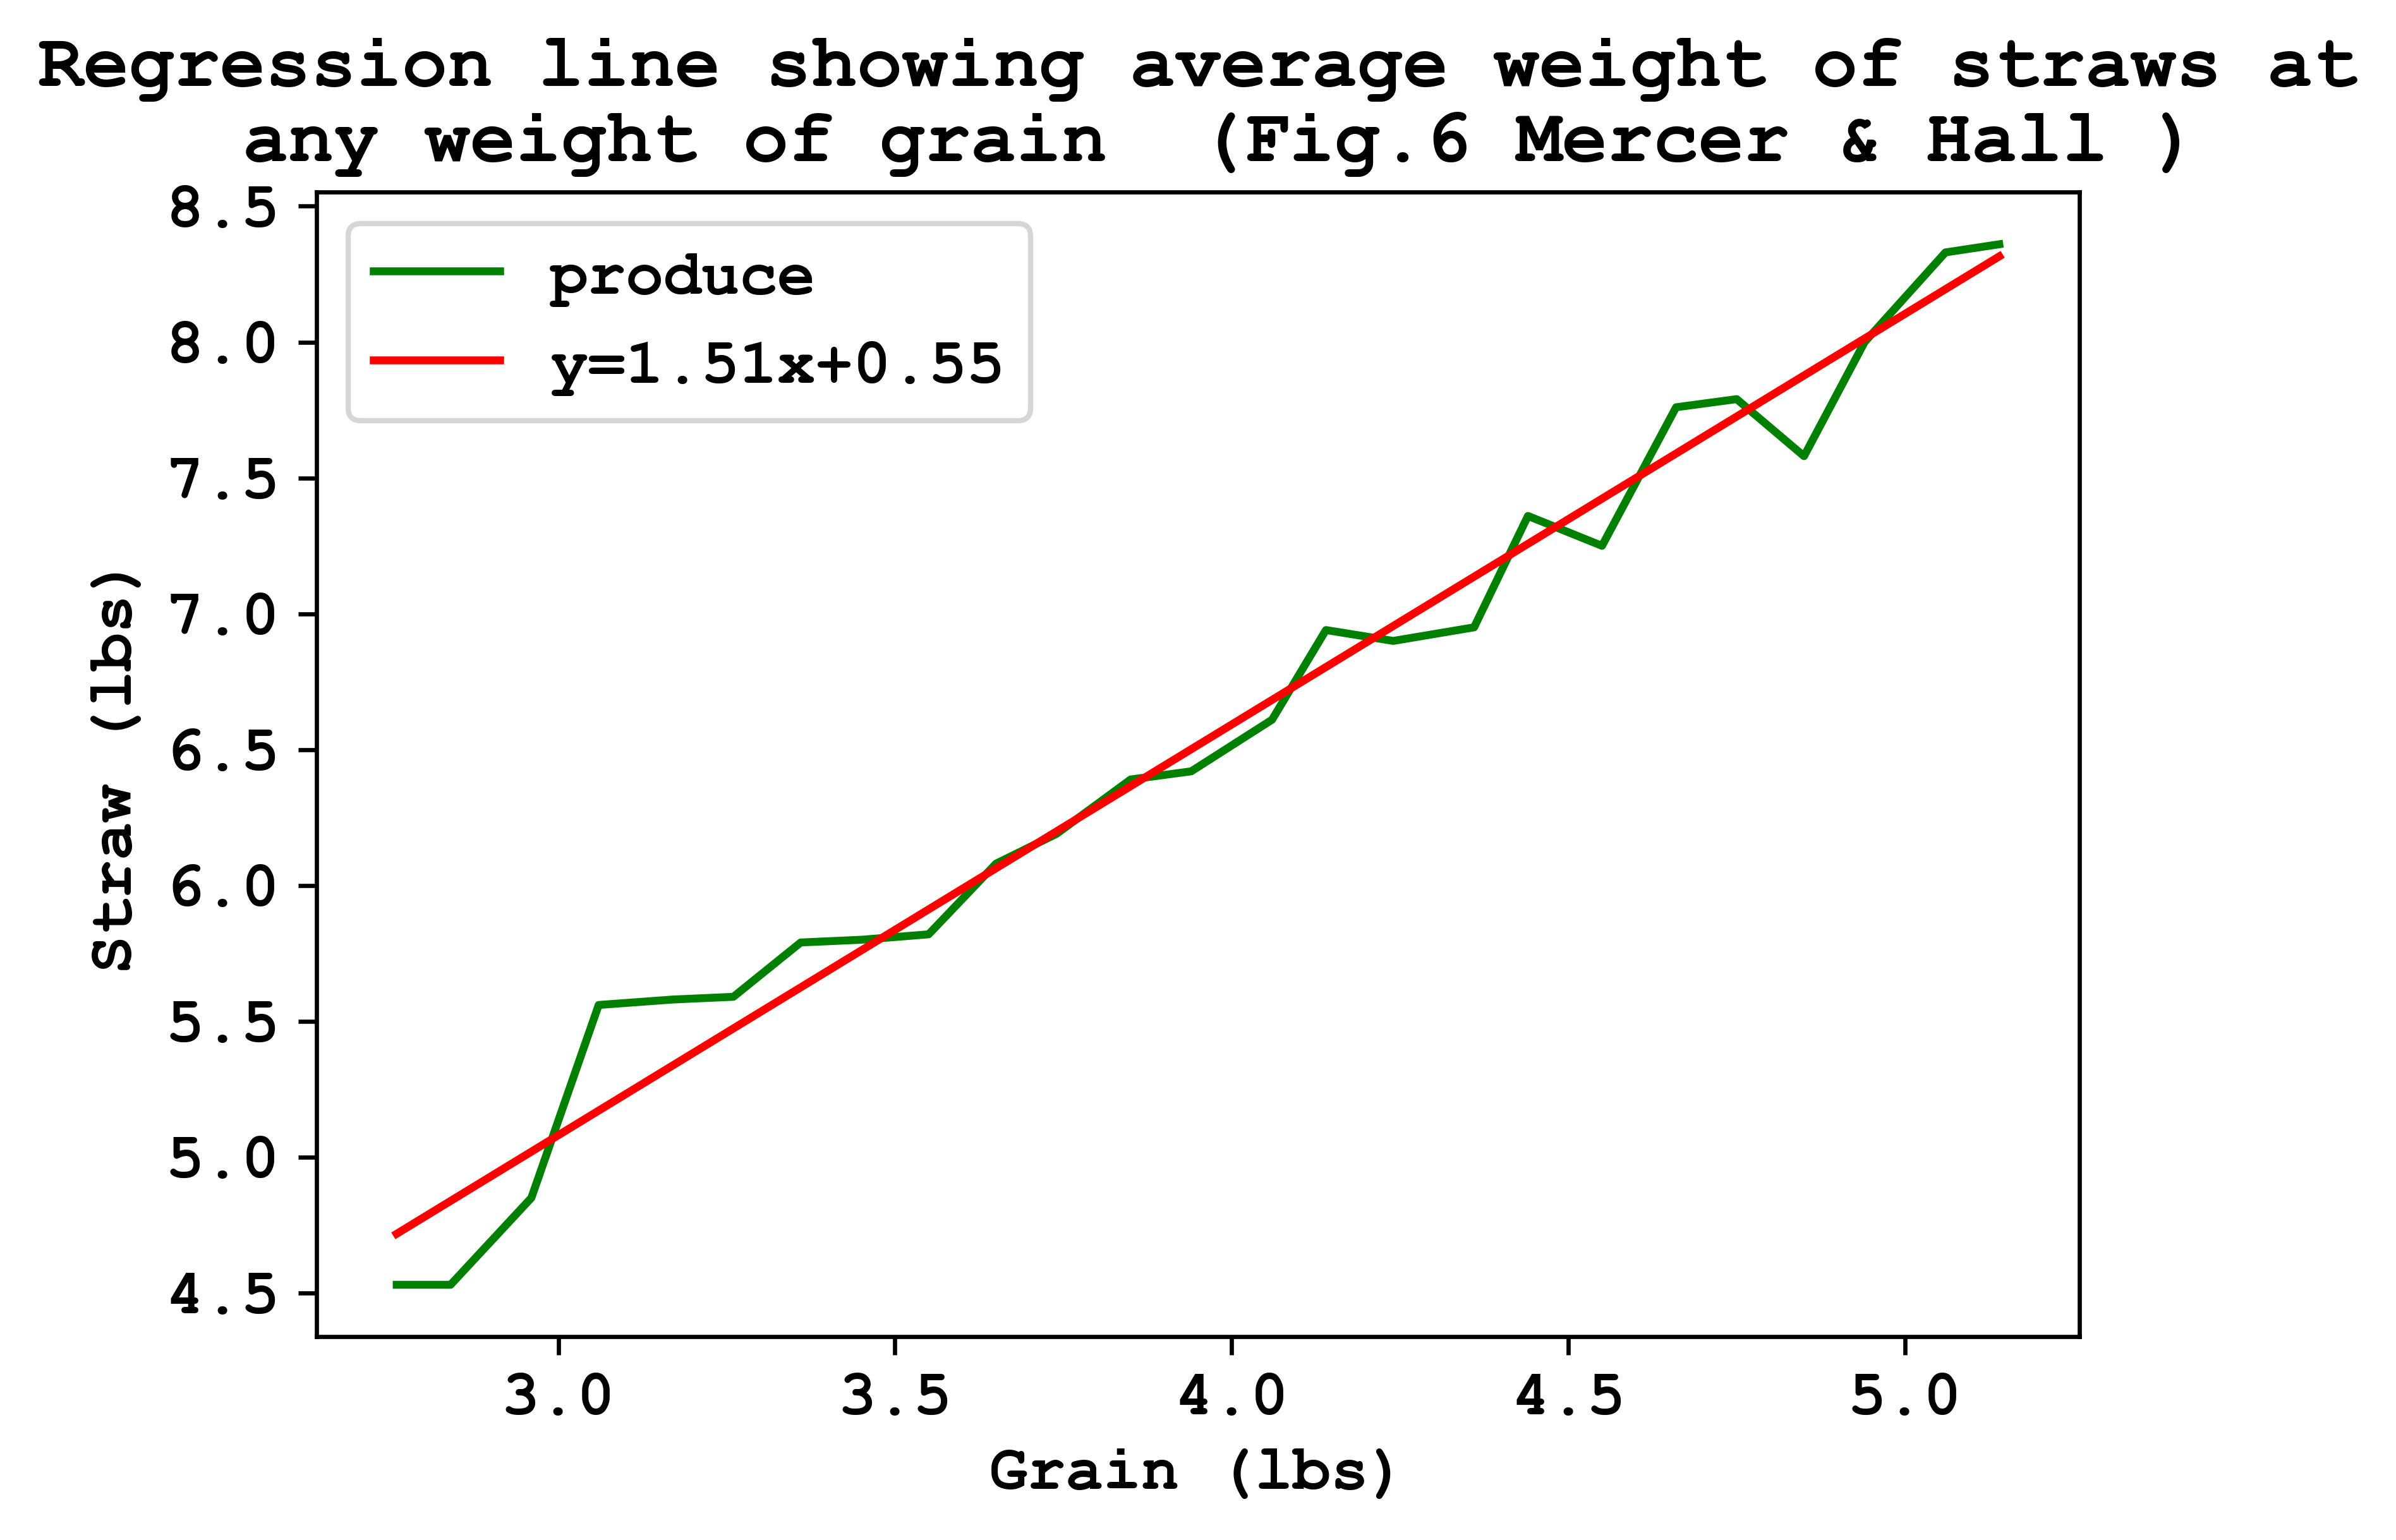

In [28]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
from matplotlib import pyplot
from scipy import stats
plt.rcParams["font.family"] = "Courier New"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12


x=df_grain_stat["Mean_g"]
y=df_grain_stat["Mean_s"]
ax=plt.subplot()
plt.plot(x,y , color="green", alpha=1, label="produce")
plt.xlabel("Grain (lbs)",fontweight= "bold")
plt.ylabel("Straw (lbs)", fontweight= "bold")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.plot(x, line, 'red', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Regression line showing average weight of straws at\n any weight of grain  (Fig.6 Mercer & Hall )",fontweight= "bold")
plt.legend(loc='upper left')


plt.show()






## Plot for Fig.7 Mercer and Hall


In [29]:
df_grain_flat["group_g"]=(np.trunc(df_grain_flat["Grain"]*10))/10
dict_df=df_grain_flat.groupby(["group_g"]).mean().round(2).reset_index()
dict_gg=dict(zip(dict_df.group_g,dict_df.Grain))
df_grain_flat['Mean_g']=df_grain_flat['group_g'].map(dict_gg)

In [30]:
bins = np.arange(start=2.4,stop=5.6, step=0.2)
df_grain_flat['binned'] = pd.cut(df_grain_flat['group_g'], bins)
df_grain_flat['Bin_l'] = df_grain_flat.iloc[:, 3].apply(lambda x: '{}'.format(x.left )).astype(float)
df_grain_flat['Bin_r'] = df_grain_flat.iloc[:, 3].apply(lambda x: '{}'.format(x.right )).astype(float)

In [31]:
df_vc_g=df_grain_flat["Bin_r"].value_counts(bins=13,sort=False)
df_vc_g=df_vc_g.reset_index()
df_vc_g['Bin_left'] = df_vc_g.iloc[:, 0].apply(lambda x: '{}'.format(x.left )).astype(float)
df_vc_g['Bin_right'] = df_vc_g.iloc[:, 0].apply(lambda x: '{}'.format(x.right )).astype(float)
df_vc_g['Bin_right']=(np.trunc(df_vc_g['Bin_right']*10))/10

In [32]:
def normal_dist(x , mean , sd):
    prob_density = (((1/np.sqrt(np.pi*(sd**2)*2))) * np.exp(-0.5*((x-mean)/sd)**2))
    return prob_density

#df_grain_flat["PDF"]=normal_dist(df_grain_flat["Mean_g"],mean,sd)

In [33]:
sd=df_grain_flat["Mean_g"].std()
mean=df_grain_flat["Mean_g"].mean()
df_grain_flat["PDF"]=normal_dist(df_grain_flat["Mean_g"],mean,sd)
df_grain_flat=df_grain_flat.sort_values(by='Mean_g',ascending=True)

#plt.plot(df_grain_flat["Mean_g"],df_grain_flat["PDF"] , color="red", alpha=1, label="Theoretical")

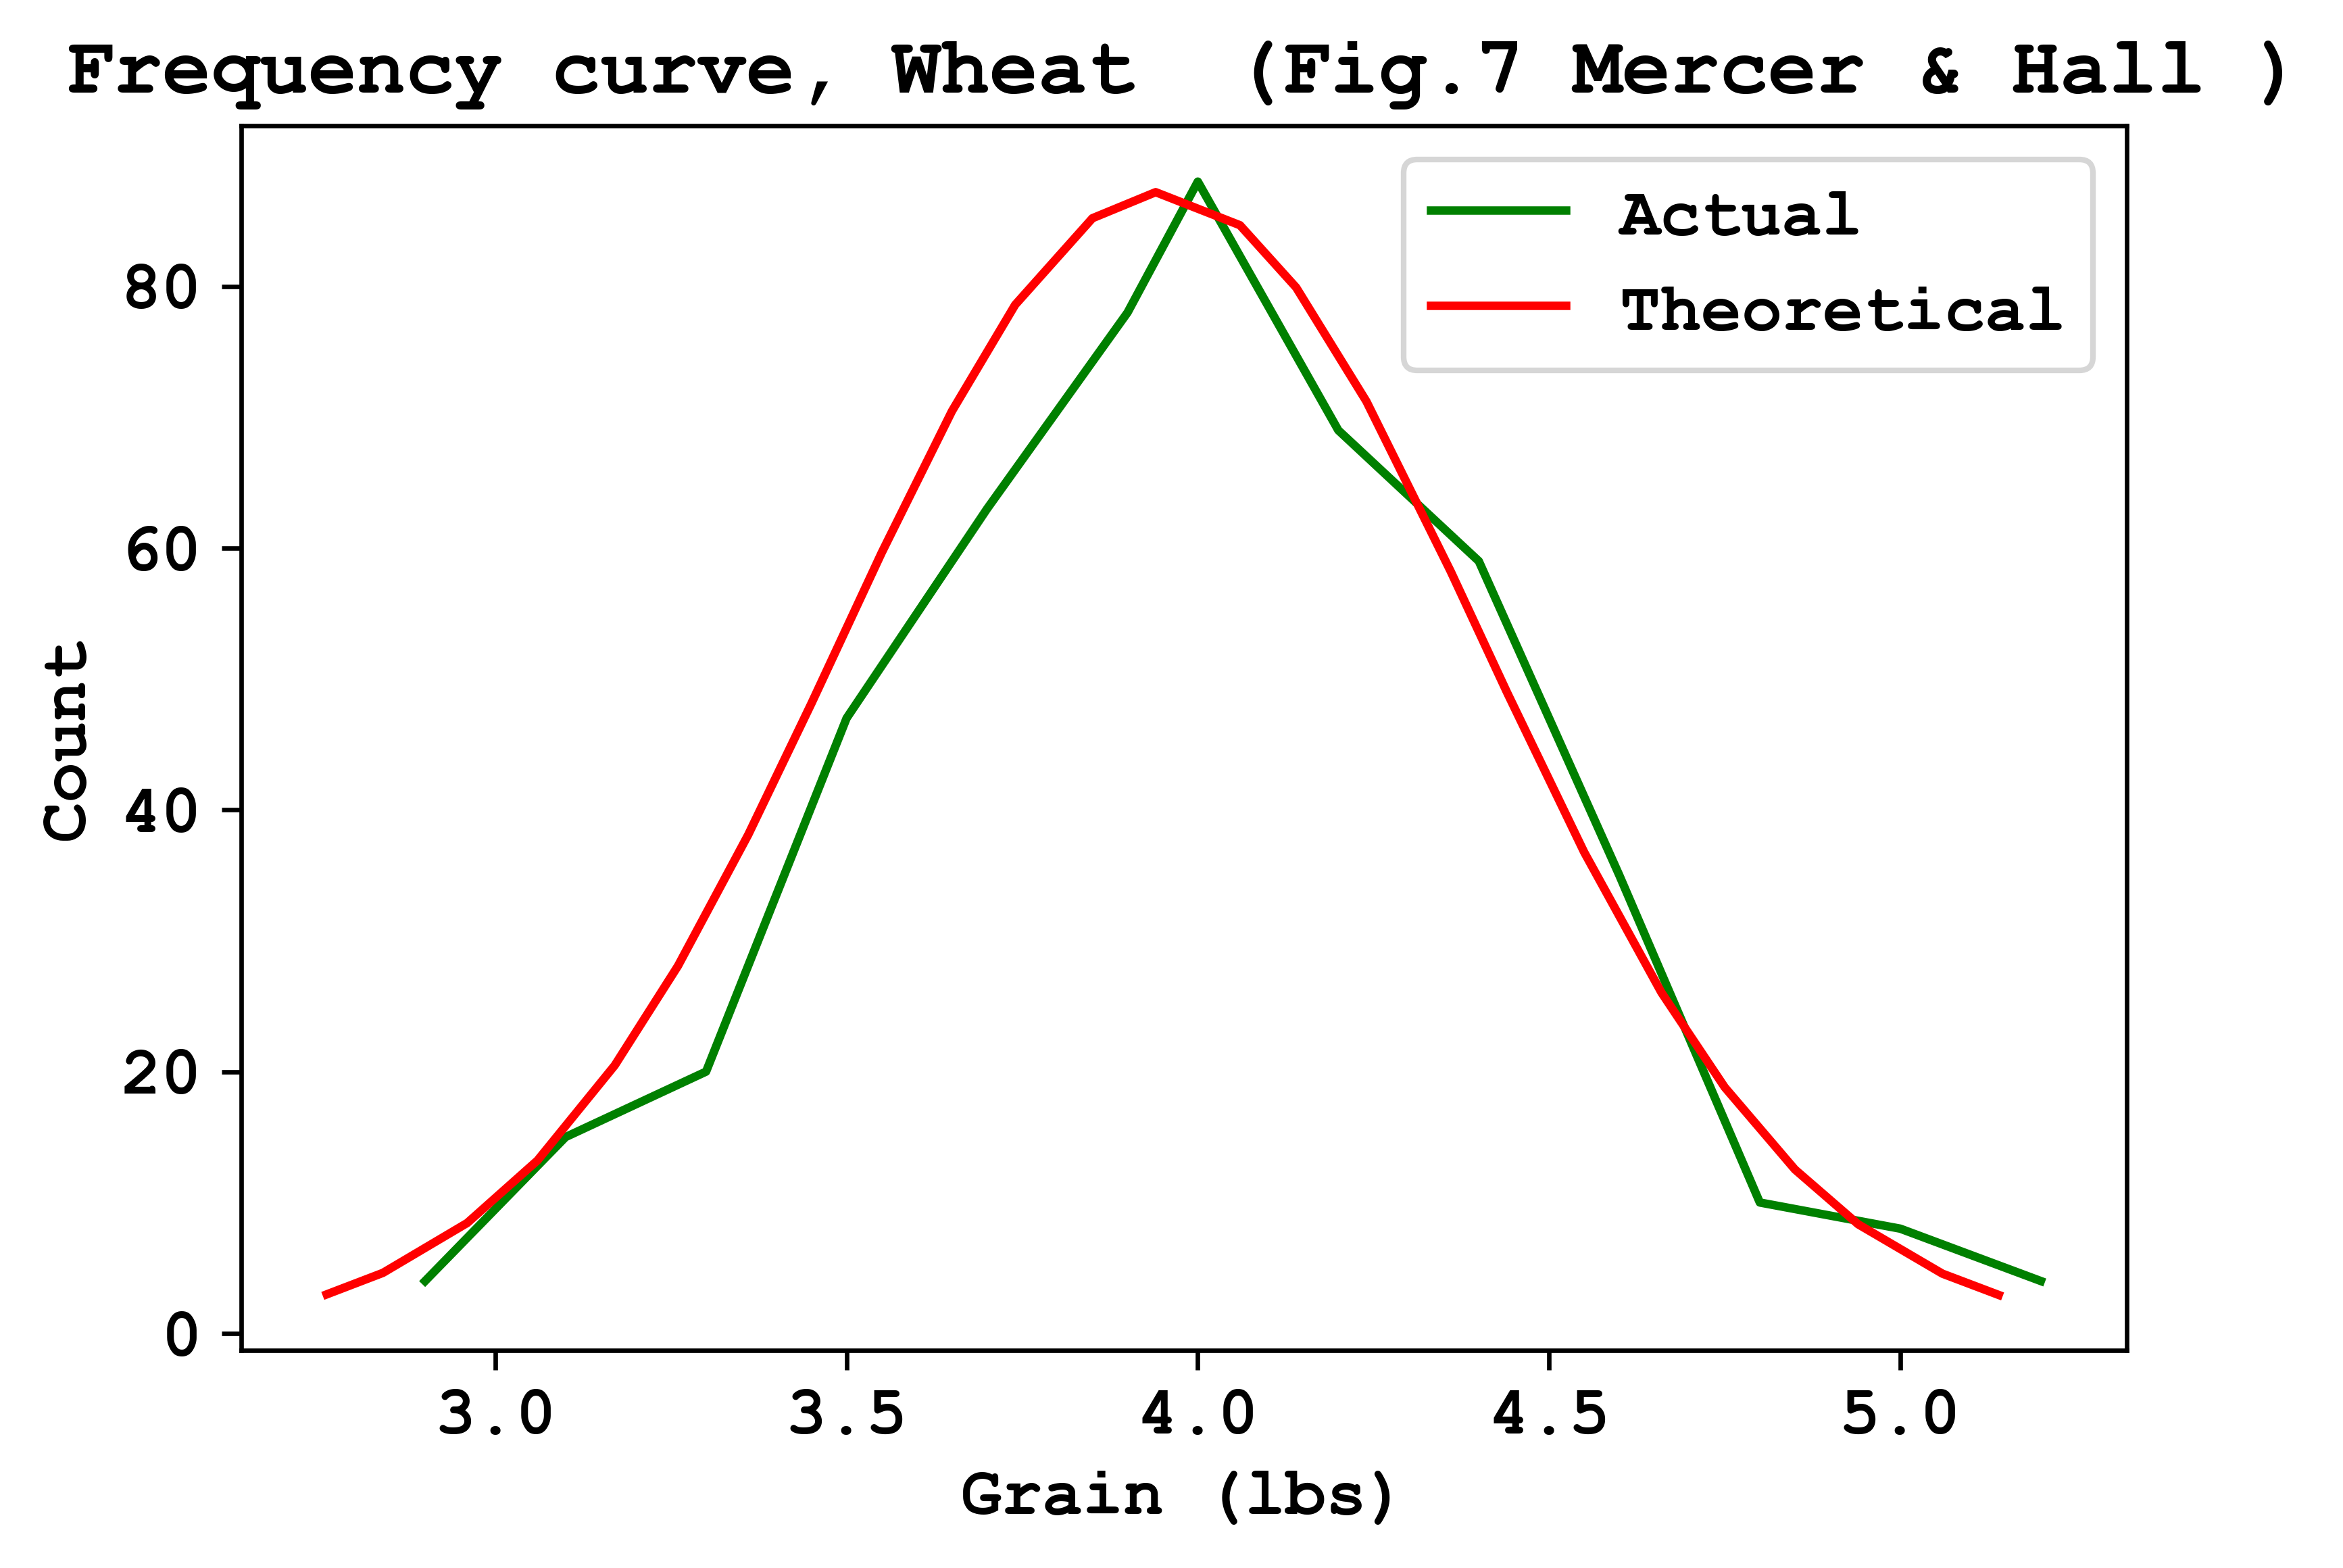

In [34]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
from matplotlib import pyplot
from scipy import stats
plt.rcParams["font.family"] = "Courier New"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12

fig,ax=plt.subplots()
ax1=ax
ax.plot(df_vc_g["Bin_right"],df_vc_g["Bin_r"] , color="green", alpha=1, label="Actual")
ax1.plot(df_grain_flat["Mean_g"],df_grain_flat["PDF"]*100, color="red", alpha=1, label="Theoretical")

ax.set_xlabel("Grain (lbs)", fontweight="bold")
ax.set_ylabel("Count", fontweight="bold")
plt.title("Frequency curve, Wheat  (Fig.7 Mercer & Hall )",fontweight= "bold")
plt.legend(loc='upper right')



## Plot for Mercer and Hall Fig.8


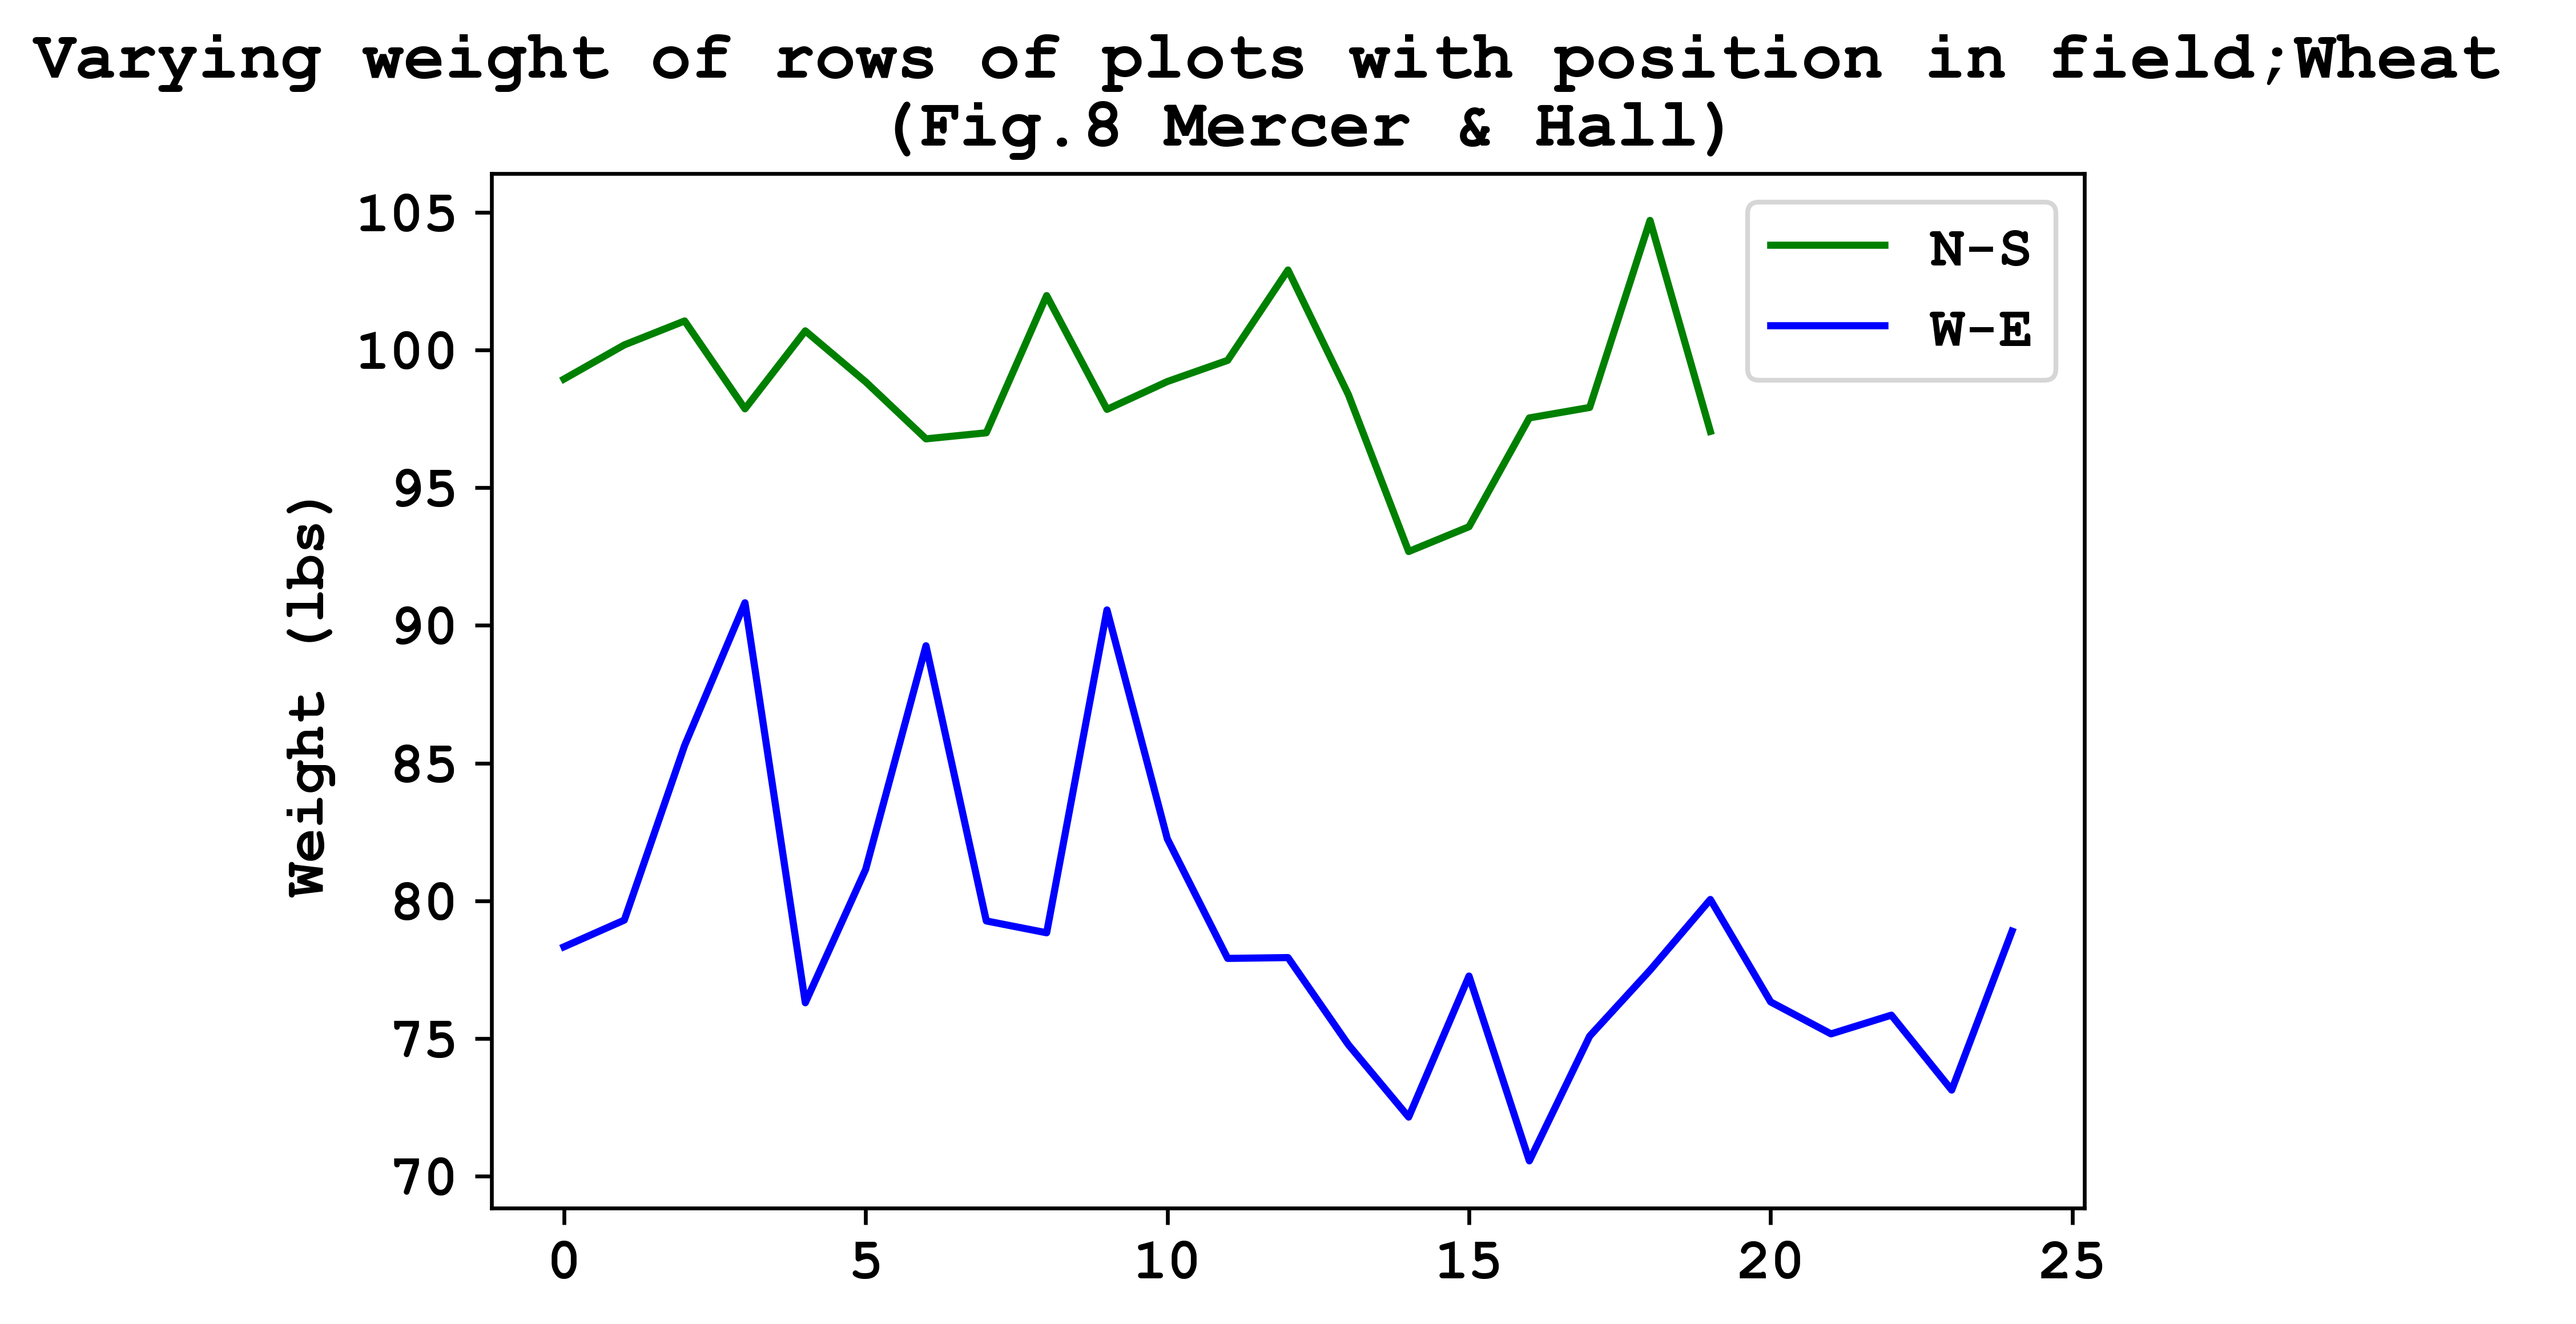

In [35]:
df_col=df_grain.sum(axis=1)
df_row=df_grain.sum(axis=0)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
from matplotlib import pyplot
from scipy import stats
plt.rcParams["font.family"] = "Courier New"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.plot(df_col,  color="green", alpha=1, label="N-S")
plt.plot(df_row,  color="blue", alpha=1, label="W-E")
plt.title("Varying weight of rows of plots with position in field;Wheat \n (Fig.8 Mercer & Hall)", fontweight="bold")
plt.ylabel("Weight (lbs)", fontweight="bold")
plt.legend(loc="upper right")

## Plot for Fig.9 of Mercer and Hall

- the next section is the create_plots function which creates different   size plots selecting and aggregating random plots in no order selected by np.random.randint function.

- This function returns a series of aggregated plot grain weights


In [36]:
def create_plots(plot_size,size_row,size_col):
    rand_index=np.random.randint(499, size=(size_row, size_col))
    arr_250=np.take(grain, rand_index)
    arr_250_s=np.sum(arr_250, axis=0)
    df_theoretical=pd.DataFrame()
    df_theoretical=pd.DataFrame(pd.Series(arr_250_s))
    df_theoretical.columns=[plot_size]
    return (df_theoretical)

The `create_plots` function is called here inside the for loop to append the plots into a single list

In [37]:
list_plot=[500,250,125,50,25,10]
df_th=pd.DataFrame()
list_th=[]
for x in list_plot:
    c=500//x
    r=x
    plot_size="1/"+ str(x)
    df=pd.DataFrame(create_plots(plot_size,c,r))
    #print(df.head())
    #print(df.head())
    list_th.append(df)
    #print(len(list_th))
df_th=pd.concat(list_th)

#### The split_df function splits the array into grouped plots

     -  The grouped plots are consecutive plots of required length 
            for example:
                   -  1/50 plot size will have 50 plots 
                   -  the number of 1/500 sized plots aggregated to create 1/50 size plot = 10

In [38]:
def split_df(array,split):
    list_split= np.array_split(array,split)
    df_split=pd.DataFrame(list(map(np.ravel,list_split )))
    df_split[split]=df_split.sum(axis=1)
    return(df_split[split])

- the function `split_df` takes the 1D array **grain** and size of plot as input values. 
- The output is a list of dataframes with each dataframe holding the plot grain weight

In [39]:
list_plot=[500,250,125,50,25,10]
df_plots_grain=pd.DataFrame()
list_df=[]
for x in list_plot:
    print("plot_size :", x)
    df=pd.DataFrame(split_df(grain,x))
    #print(df.head())
    #print(df.head())
    list_df.append(df)
print("The number of elements in list_df: ", len(list_df))

plot_size : 500
plot_size : 250
plot_size : 125
plot_size : 50
plot_size : 25
plot_size : 10
The number of elements in list_df:  6


In [40]:
df_plots_grain=pd.concat(list_df)
df_plots_grain.columns=["1/10","1/25","1/50","1/125","1/250","1/500"]
df_plots_grain=df_plots_grain.iloc[:, ::-1]

In [41]:
##The Standard deviation calculation formula is written in the `stdev` function

In [42]:
def stdev(plot_s,df_plots_grain):
    df_stdev=df_plots_grain[[plot_s]].copy().dropna()
    #print(df_stdev.head())
    df_stdev["group_g"]=(np.trunc(df_stdev[plot_s]*10))/10
    dict_df=df_stdev.groupby(["group_g"]).mean().round(2).reset_index()
    dict_gg=dict(zip(dict_df["group_g"],dict_df[plot_s]))
    df_stdev['Mean_g']=df_stdev['group_g'].map(dict_gg)

    df_stdev_count=df_stdev["group_g"].value_counts().reset_index()
    df_stdev_count.columns=["group_g","count"]
    df_stdev_count=df_stdev_count.sort_values(by="group_g", ascending=True)
    mean_500=df_stdev[plot_s].sum()/len(df_stdev[plot_s])
    mean_500=mean_500.round(1)
    print("mean_500= ", mean_500)
    len_col=len(df_stdev_count["group_g"])   

    n=len(df_stdev[plot_s])
    print(n)
    start=df_stdev_count[df_stdev_count<mean_500].count()
    index=np.arange(start= (-1*start[0]), stop=len_col-start[0], step =1)
    print(index)
    df_stdev_count=df_stdev_count.assign(coeff=index)
    df_stdev_count["count\*coeff"]= df_stdev_count["count"]*df_stdev_count["coeff"]
    df_stdev_count["count\*coeff2"]= df_stdev_count["count"]*(df_stdev_count["coeff"]**2)
    v1=(df_stdev_count["count\*coeff"].sum())/n
    v2=(df_stdev_count["count\*coeff2"].sum())/n
    sd=np.sqrt(v2-(v1**2)-(1/(len_col//2)))*0.1*np.sqrt(n/(n-1))
    mean=((df_stdev[plot_s].sum())/n) +(0.1*v1)
    sd_p=((sd/mean)*100)
    print(sd_p, mean)
    return(plot_s, sd_p)

In [43]:
plot_list=["1/500","1/250","1/125","1/50","1/25","1/10"]
list_ps=[]
list_sd=[]
for index in plot_list:
    print(index)
    x=stdev(index,df_plots_grain)
    list_ps.append(x[0])
    list_sd.append(x[1])

1/500
mean_500=  3.9
500
[-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]
11.618433074215972 3.94824
1/250
mean_500=  7.9
250
[-18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1
   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]
9.039506015704255 7.849279999999999
1/125
mean_500=  15.8
125
[-23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6
  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12
  13  14  15  16  17  18  19  20]
6.744639492004531 15.77296
1/50
mean_500=  39.5
50
[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13]
1.9465015450696388 39.410399999999996
1/25
mean_500=  79.0
25
[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11]
0.7933468924377679 79.08879999999999
1/10
mean_500=  197.4
10
[-3 -2 -1  0  1  2  3  4  5  6]
0.15136633941794936 197.582


In [44]:
plot_list=["1/500","1/250","1/125","1/50","1/25","1/10"]
list_ps_th=[]
list_sd_th=[]
for index in plot_list:
    print(index)
    x=stdev(index,df_th)
    list_ps_th.append(x[0])
    list_sd_th.append(x[1])

1/500
mean_500=  3.9
500
[-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]
10.946564047788113 3.8650999999999995
1/250
mean_500=  7.9
250
[-17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]
7.654906239680518 7.81292
1/125
mean_500=  15.9
125
[-18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1
   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18]
5.553616754588069 15.77208
1/50
mean_500=  39.3
50
[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15]
2.0693534196963355 39.3406
1/25
mean_500=  78.7
25
[-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10]
0.828540146205144 78.62
1/10
mean_500=  197.1
10
[-6 -5 -4 -3 -2 -1  0  1  2  3]
0.15182431276779706 196.986


In [45]:
from fractions import Fraction
input_string = '["1/500","1/250","1/125","1/50","1/25","1/10"]'
parsed_input = [item for item in ''.join((char if char in '0123456789./' else '-') for char in input_string).split('-') if item]
output_array = [Fraction(i).limit_denominator(1000) for i in parsed_input]

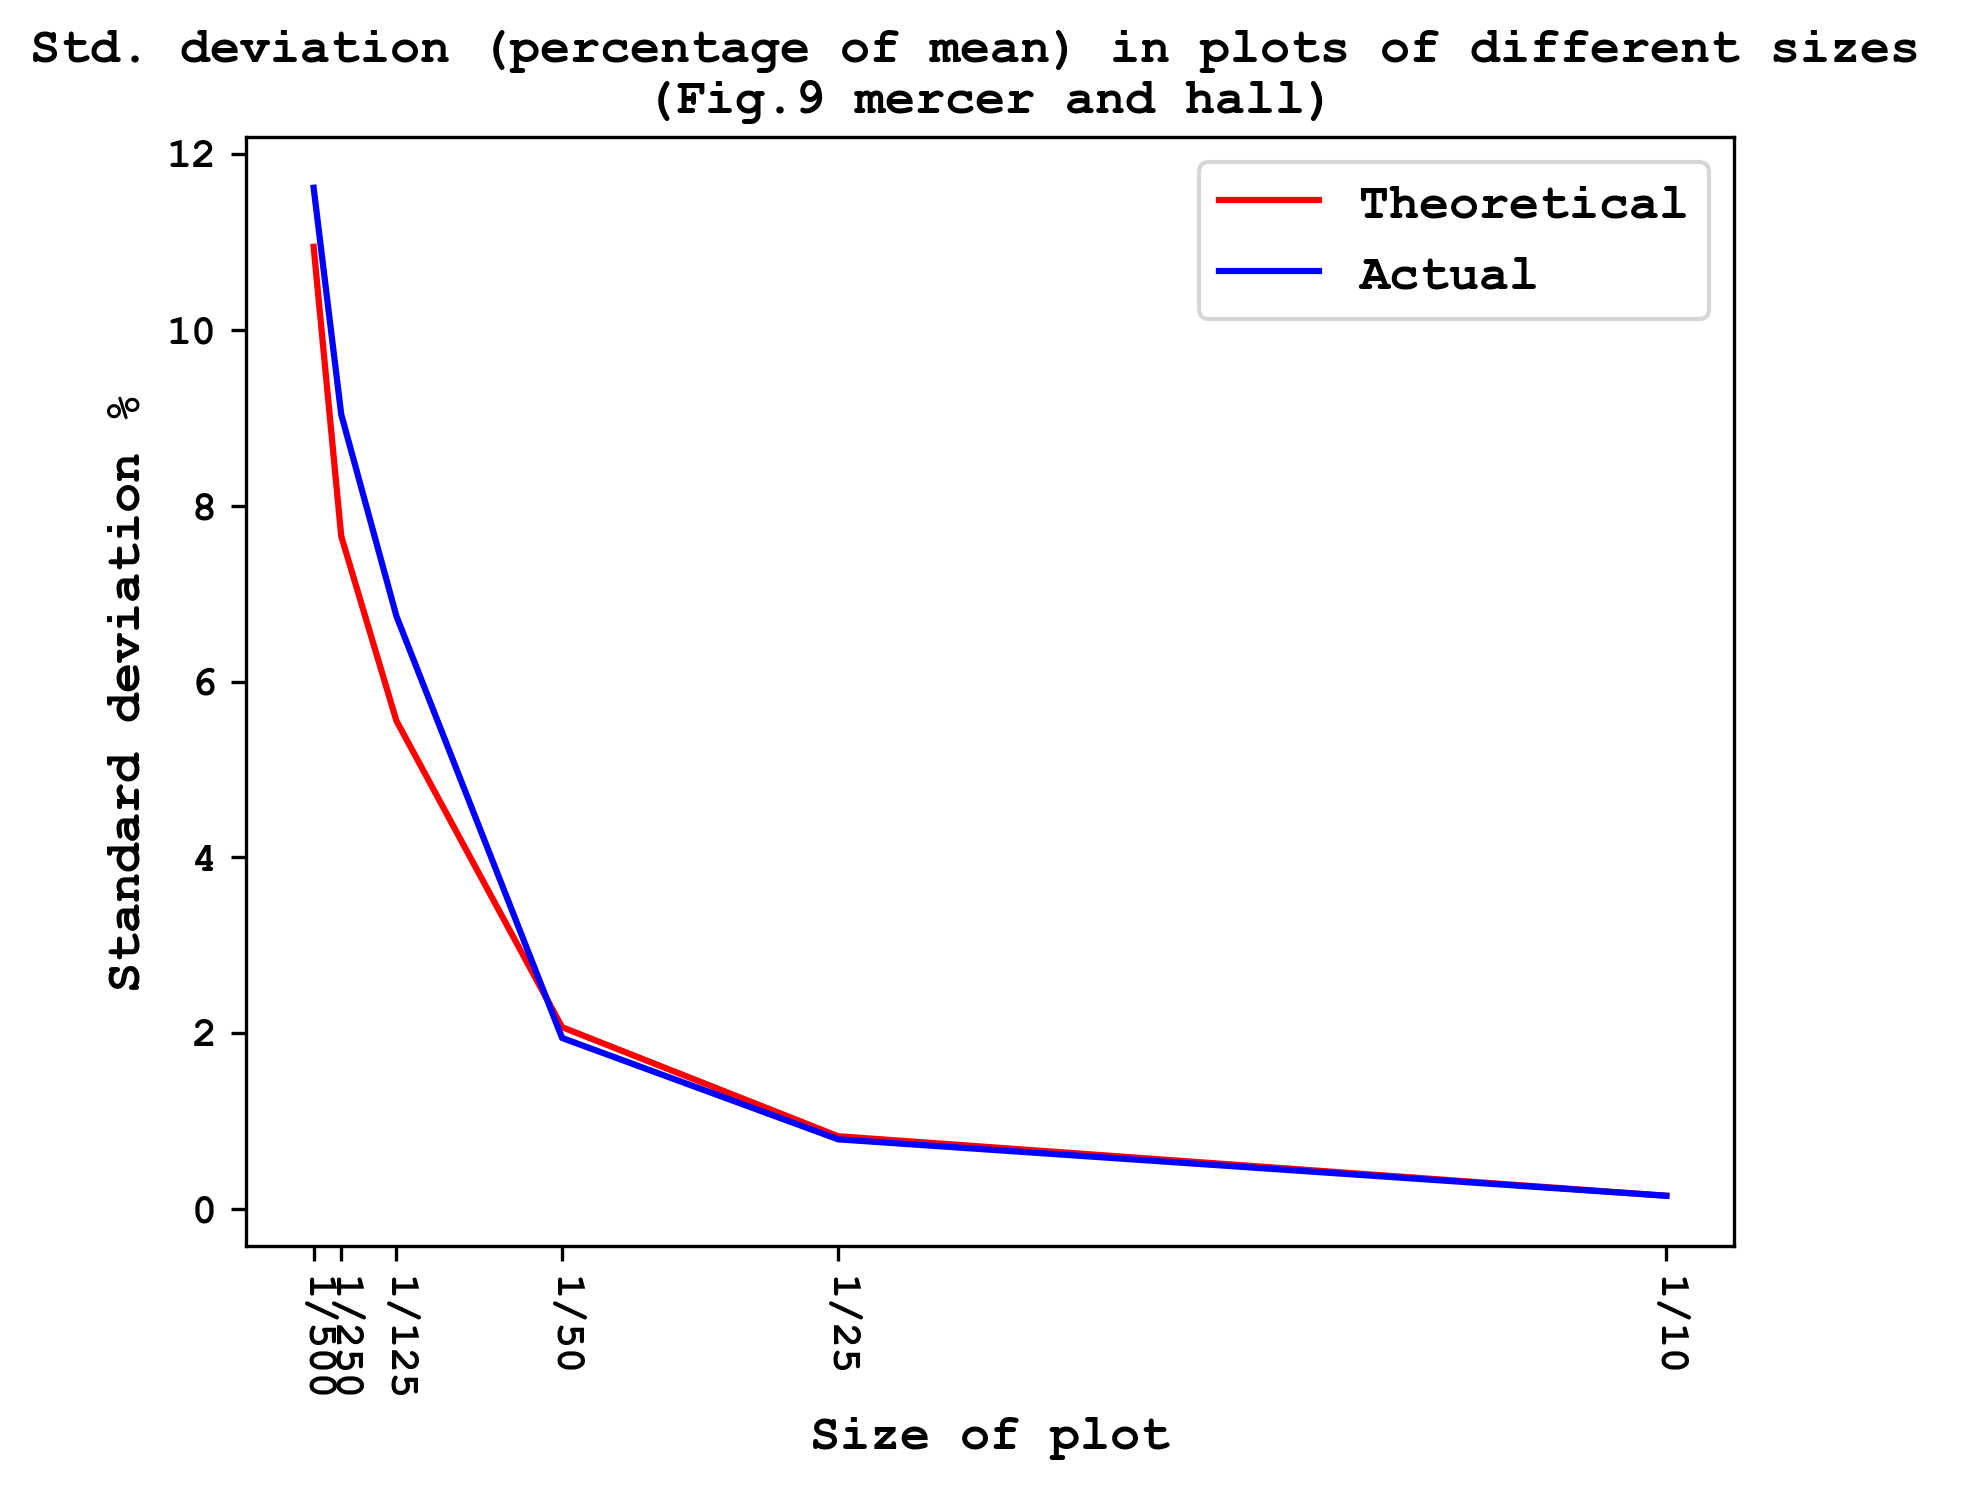

In [46]:
import matplotlib as mpl
plt.rcdefaults()
mpl.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Courier New"
plt.rcParams["font.weight"] = "bold"
#plt.xkcd() #poison
#plt.rcdefaults()#antedote

fig, ax =plt.subplots()
ax1=ax
X_tick = [Fraction(item).limit_denominator() for item in output_array]
plt.xticks(np.unique(output_array), X_tick, rotation=270)
ax.plot(output_array,list_sd_th, color="red", alpha=1, label="Theoretical")
ax1.plot(output_array,list_sd, color="blue", alpha=1, label="Actual")
plt.title("Std. deviation (percentage of mean) in plots of different sizes \n (Fig.9 mercer and hall) ",fontweight="bold")
ax.set_ylabel('Standard deviation %', fontsize=12,fontweight="bold")
ax.set_xlabel('Size of plot',fontsize=12,fontweight="bold")
ax.legend(fontsize=12,loc=1)